<a href="https://colab.research.google.com/github/KimJeonghun91/AWS-Certified-Machine-Learning-Specialty-MLS-C01-Certification-Guide/blob/master/%EC%86%90%EA%B8%80%EC%94%A8_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 필요 라이브러리 추가

In [ ]:
import sys
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import backend
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

- Keras 에서 데이터를 가져옴
- Train set : 실제 인공지능을 학습시키는 데이터.
- Test set : 테스트를 위한 Train set에 존재하지 않는 데이터

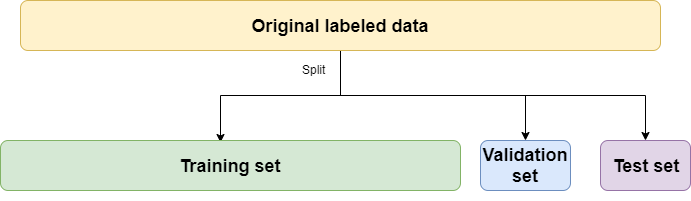

In [ ]:
# Mnist 데이터셋 불러오기
# X_train : 값 , Y_train : 라벨
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Train set 과 Test set 정리하기
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

print('X_train 갯수:', X_train.shape[0])
print('Y_train 갯수:', Y_train.shape[0])

11501568/11490434 [==============================] - 0s 0us/step
X_train 갯수: 60000
Y_train 갯수: 60000


- epochs : 학습 횟수
-  batch_size : 학습 데이터 그룹 크기 -> 전체 트레이닝 셋을 작게 나누는 이유는 트레이닝 데이터를 통째로 신경망에 넣으면 비효율적



In [ ]:
#CNN 모델 만들기
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

# CNN 모델 학습하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=3,
                 verbose=1,
                 validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0


- 학습 데이터 테스트
- 학습 데이터의 손실률 : 손실(Loss)은 실제 정답과 모델이 예측 한 값 사이의 차이(거리 또는 오차)이다. 즉, 손실이 클수록 데이터에 대한 오류도 커진다. 쉽게 말해, 틀리게 예측한 경우 얼마나 오류를 범했는가로 볼 수 있다
- 학습 데이터의 정확도 : Accuracy는 전체 샘플의 개수들 중에서 얼마나 나의 알고리즘이 정답이라고 예측한 샘플이 포함되었는지의 비율을 의미한다. 예를 들어서, 내 알고리즘이 90% 정확하다면, 100개의 샘플들 중에서 90개만 정확하게 분류 하는 것이다. 

313/313 [==============================] - 3s 10ms/step - loss: 0.0375 - accuracy: 0.9873
loss_and_metrics : [0.037514735013246536, 0.9872999787330627]


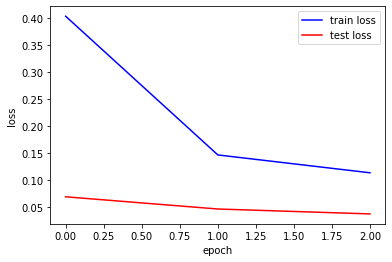

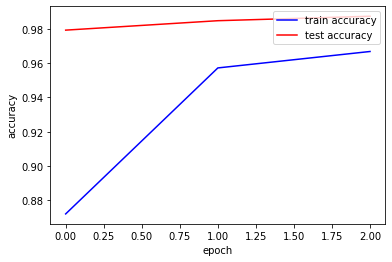

In [ ]:
# Test
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

#loss graph (손실률) 표로 그리기
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

#Accuracy graph (정확도) 표로 그리기
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
loss_ax.plot(hist.history['val_accuracy'], 'r', label='test accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
# OpenCV 라이브러리
import cv2
from google.colab.patches import cv2_imshow

# 파일 업로드 기능
from google.colab import files
uploaded = files.upload()

# 혹은 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

for fn in uploaded.keys():
  # 파일열기
  img = cv2.imread(fn,  cv2.IMREAD_GRAYSCALE)
  cv2_imshow(img)

  # 손글씨 사진 크기 조절하기
  img = cv2.resize(255-img, (28, 28))
  img.shape

  test_num = img.flatten()/255.0
  test_num = test_num.reshape((-1, 28, 28, 1))
  test_num.shape


  print('The answer is ', np.argmax(model.predict(test_num), axis=-1))
  plt.show()